In [1]:
""" Problem 10.4: System Selection Problem: 
    (a) Perform effectiveness analysis with AHP using AHP3Lmodel Class
    (b) Perform cost-effectiveness and efficient frontier analysis using
        Cost_Effective_Analysis Class """
from DecisionAnalysisPy import AHP3Lmodel, Cost_Effective_Analysis
import numpy as np

In [2]:
# # Effectiveness analysis using AHP model 
goal = "Best System"
main_criteria =["Human Productivity", "Economics", "Design", "Operations"]

# Upper triangle of criteria pairwise comparison matrix
main_cr_matrix = np.array([ 3, 3, 7,
                               2, 5,
                                  7 ])

alternatives = ["System A", "System B", "System C" ]
 # Upper triangles of alternatives pairwise comp matrix wrt each criterion
alt_matrixs  = [ np.array([ 3,   5,   2 ]),
                 np.array([1/3, 1/2,  3 ]),
                 np.array([1/2, 1/7, 1/5]),
                 np.array([ 3,  1/5, 1/9])]

In [3]:
# Create an instance of a 3-Level AHP model
P104 = AHP3Lmodel(goal, main_criteria, main_cr_matrix, alternatives, alt_matrixs)
P104.model()

Model Summary:
Goal: Best System
Criteria:
  Number = 4
  ['Human Productivity', 'Economics', 'Design', 'Operations']

Pairwise comparison w.r.t. Goal Best System:
[[ 1    3    3    7  ]
 [1/3   1    2    5  ]
 [1/3  1/2   1    7  ]
 [1/7  1/5  1/7   1  ]]

Alternatives:
  Number = 3
  ['System A', 'System B', 'System C']

Pairwise comparison w.r.t criterion Human Productivity
[[ 1    3    5  ]
 [1/3   1    2  ]
 [1/5  1/2   1  ]]

Pairwise comparison w.r.t criterion Economics
[[ 1   1/3  1/2 ]
 [ 3    1    3  ]
 [ 2   1/3   1  ]]

Pairwise comparison w.r.t criterion Design
[[ 1   1/2  1/7 ]
 [ 2    1   1/5 ]
 [ 7    5    1  ]]

Pairwise comparison w.r.t criterion Operations
[[ 1    3   1/5 ]
 [1/3   1   1/9 ]
 [ 5    9    1  ]]


In [4]:
# Solve the model
sys_global_wt = P104.solve(method='Power')
# "Power", "Algebra", "RGM", "ColsNorm", "GenEigen"


Model Summary:
  Goal: Best System
  Criteria: ['Human Productivity', 'Economics', 'Design', 'Operations']
  Alternatives: ['System A', 'System B', 'System C']

Criteria w.r.t. Goal Best System:

[[ 1    3    3    7  ]
 [1/3   1    2    5  ]
 [1/3  1/2   1    7  ]
 [1/7  1/5  1/7   1  ]]
Lambda_max = 4.212088, CI= 0.070696, CR= 0.078551
Criteria Weights= [0.513052 0.246592 0.193575 0.046781]

Alternatives w.r.t. criterion Human Productivity
[[ 1    3    5  ]
 [1/3   1    2  ]
 [1/5  1/2   1  ]]
Lambda_max = 3.003695, CI= 0.001847, CR= 0.003185
Local Weights= [0.648329 0.229651 0.12202 ]

Alternatives w.r.t. criterion Economics
[[ 1   1/3  1/2 ]
 [ 3    1    3  ]
 [ 2   1/3   1  ]]
Lambda_max = 3.053622, CI= 0.026811, CR= 0.046225
Local Weights= [0.157056 0.593634 0.249311]

Alternatives w.r.t. criterion Design
[[ 1   1/2  1/7 ]
 [ 2    1   1/5 ]
 [ 7    5    1  ]]
Lambda_max = 3.014152, CI= 0.007076, CR= 0.012200
Local Weights= [0.093813 0.166593 0.739594]

Alternatives w.r.t. criteri


Sensivity Analysis:

Rainbow Diagram for changing weight of criterion Human Productivity


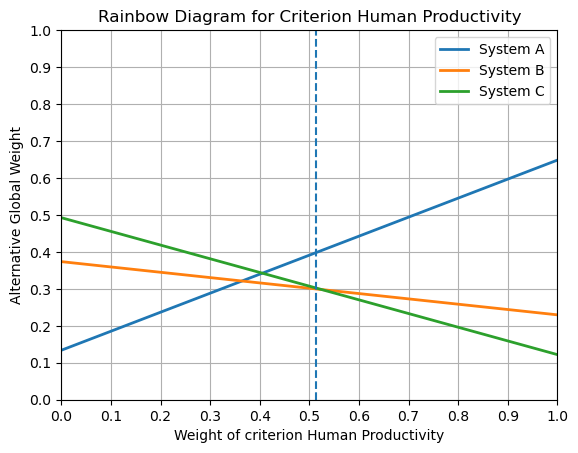


Rainbow Diagram for changing weight of criterion Economics


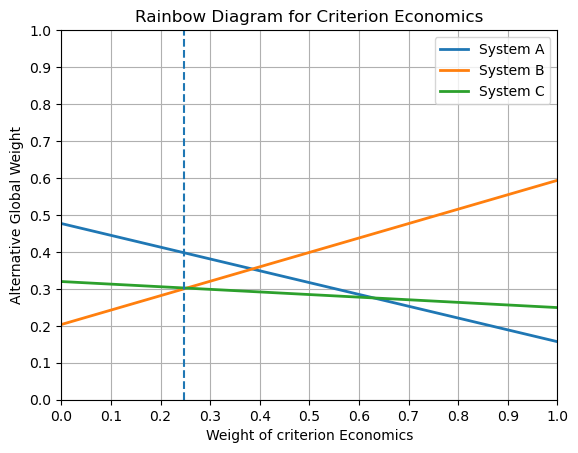


Rainbow Diagram for changing weight of criterion Design


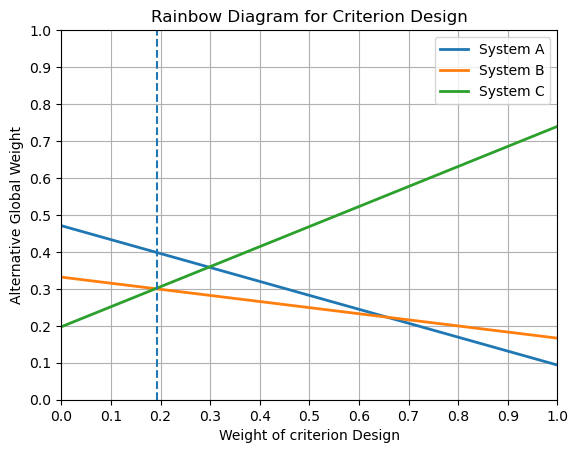


Rainbow Diagram for changing weight of criterion Operations


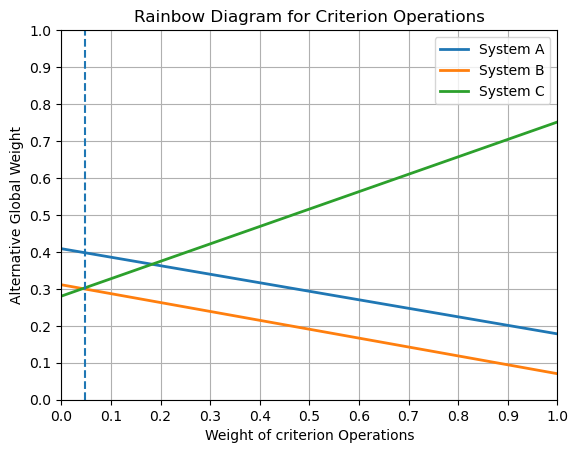

In [5]:
# Performance sensitivity analysis
P104.sensit()

In [6]:
# Perform cost-effectiveness and efficient frontier analysis
Attributes = ['EUAC ($K)', 'Effectiveness']

EUAC = {'System A' : 100,
        'System B' :  80,
        'System C' : 110 }

EUAC_Eff = { system : (EUAC[system],sys_global_wt[system]) 
                for system in alternatives}

In [7]:
# Create a Cost-Effective Analysis Problem
SysSelect = Cost_Effective_Analysis(Attributes, EUAC_Eff)

In [8]:
# Get the efficient set 
eff_set = SysSelect.get_efficient_set()
print("\nEfficient system:")
for sys, vals in eff_set.items():
    print(f"  {sys}: {vals}")


Efficient system:
  System B: (80, 0.29975039656886754)
  System A: (100, 0.39785032490707145)


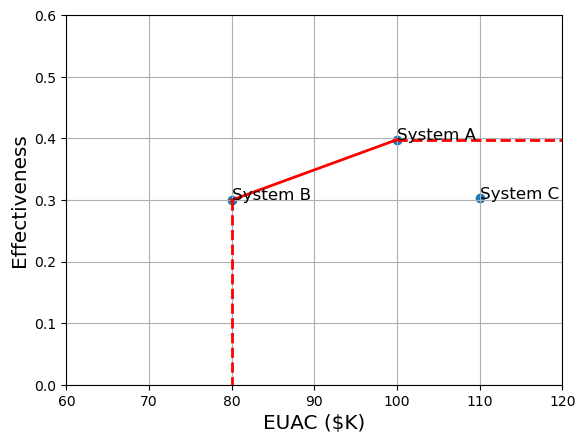

In [9]:
# Plot the efficient frontier
SysSelect.plot_efficient_frontier((60, 120), (0, 0.6), dpi=100)